In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/HW3/metadata.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)

In [ ]:
df.head(3)

,filename,giraffe,zebra
0,000000000001.jpg,0,1
1,000000000002.jpg,0,1
2,000000000003.jpg,0,1


In [ ]:
df.tail(3)

,filename,giraffe,zebra
4945,000000004946.jpg,1,0
4946,000000004947.jpg,1,0
4947,000000004948.jpg,1,0


In [ ]:
print("File Name\t\t\tGiraffe\t\tZebra"+'\n'+"=====================================================")

for index, data in df.head(10).iterrows():
    print(data['filename'], data['giraffe'], data['zebra'], sep='\t\t')

File Name			Giraffe		Zebra
000000000001.jpg		0		1
000000000002.jpg		0		1
000000000003.jpg		0		1
000000000004.jpg		0		1
000000000005.jpg		1		0
000000000006.jpg		1		0
000000000007.jpg		1		0
000000000008.jpg		0		1
000000000009.jpg		0		1
000000000010.jpg		0		1


### Overall Stats

In [ ]:
zebra_count, giraffe_count, both_count = 0, 0, 0

In [ ]:
for index, data in df.iterrows() :
  zeb, gif = data['zebra'], data['giraffe']
  if zeb == 1 and gif == 0 : zebra_count += 1
  if zeb == 0 and gif == 1 : giraffe_count += 1
  if zeb == 1 and gif == 1 : both_count += 1

assert zebra_count + giraffe_count + both_count == len(df), "Counts Unmatched !"

In [ ]:
print('Images containing only Zerbas     :', zebra_count)
print('Images containing only Giraffes   :', giraffe_count)
print('Images containing Zerba & Giraffe :', both_count)

Images containing only Zerbas     : 4398
Images containing only Giraffes   : 543
Images containing Zerba & Giraffe : 7


### Train-Test Split

---
70% Train -- 15% Val. -- 15% Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def split_images(dataframe) :

    df = dataframe

    # Train : 0.70 - Validation : 0.15 - Test : 0.15

    train_df, test_val_df = train_test_split(df, test_size=0.3, stratify=df[['giraffe', 'zebra']])                      # Train      : 0.70 -- Validation + Test : 0.30
    valid_df, test_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df[['giraffe', 'zebra']])        # Validation : 0.50 of 30 = 0.15 -- Test : 0.50 of 0.30 = 0.15

    return train_df, valid_df, test_df

In [ ]:
train_df, val_df, test_df = split_images(df)

### Training Data Stats

In [ ]:
train_zebra_count = 0
train_giraffe_count = 0
train_both_count = 0

In [ ]:
for index, data in train_df.iterrows() :
  zeb, gif = data['zebra'], data['giraffe']
  if zeb == 1 and gif == 0 : train_zebra_count += 1
  if zeb == 0 and gif == 1 : train_giraffe_count += 1
  if zeb == 1 and gif == 1 : train_both_count += 1

assert train_zebra_count + train_giraffe_count + train_both_count == len(train_df), "Counts Unmatched !"

In [ ]:
print('In Training dataset, Images containing only Zerbas     :', train_zebra_count)
print('In Training dataset, Images containing only Giraffes   :', train_giraffe_count)
print('In Training dataset, Images containing Zerba & Giraffe :', train_both_count)

In Training dataset, Images containing only Zerbas     : 3078
In Training dataset, Images containing only Giraffes   : 380
In Training dataset, Images containing Zerba & Giraffe : 5


### Validation Data Stats

In [ ]:
val_zebra_count = 0
val_giraffe_count = 0
val_both_count = 0

In [ ]:
for index, data in val_df.iterrows() :
  zeb, gif = data['zebra'], data['giraffe']
  if zeb == 1 and gif == 0 : val_zebra_count += 1
  if zeb == 0 and gif == 1 : val_giraffe_count += 1
  if zeb == 1 and gif == 1 : val_both_count += 1

assert val_zebra_count + val_giraffe_count + val_both_count == len(val_df), "Counts Unmatched !"

In [ ]:
print('In Validation dataset, Images containing only Zerbas     :', val_zebra_count)
print('In Validation dataset, Images containing only Giraffes   :', val_giraffe_count)
print('In Validation dataset, Images containing Zerba & Giraffe :', val_both_count)

In Validation dataset, Images containing only Zerbas     : 660
In Validation dataset, Images containing only Giraffes   : 81
In Validation dataset, Images containing Zerba & Giraffe : 1


### Testing Data Stats

In [ ]:
test_zebra_count = 0
test_giraffe_count = 0
test_both_count = 0

In [ ]:
for index, data in test_df.iterrows() :
  zeb, gif = data['zebra'], data['giraffe']
  if zeb == 1 and gif == 0 : test_zebra_count += 1
  if zeb == 0 and gif == 1 : test_giraffe_count += 1
  if zeb == 1 and gif == 1 : test_both_count += 1

assert test_zebra_count + test_giraffe_count + test_both_count == len(test_df), "Counts Unmatched !"

In [ ]:
print('In Training dataset, Images containing only Zerbas     :', test_zebra_count)
print('In Training dataset, Images containing only Giraffes   :', test_giraffe_count)
print('In Training dataset, Images containing Zerba & Giraffe :', test_both_count)

In Training dataset, Images containing only Zerbas     : 660
In Training dataset, Images containing only Giraffes   : 82
In Training dataset, Images containing Zerba & Giraffe : 1


### Custom Image Dataset


In [ ]:
images_dir ="/content/drive/MyDrive/HW3/images/"

In [ ]:
import os

In [ ]:
if os.path.exists(images_dir): print(f"The directory '{images_dir}' exists !! 😃😃")
else: print(f"The directory '{images_dir}' does not exist .... 😕🙁")

The directory '/content/drive/MyDrive/HW3/images/' exists !! 😃😃


In [ ]:
import torch
from torch import nn, optim
from torchvision.io import read_image
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader

In [ ]:
class CustomDataset(Dataset):

    def __init__(self, df, img_dir, mean_values, width, height, std_valeus, transform=None, target_transform=None):

        self.labels = df
        self.img_dir = img_dir
        self.transform = transform
        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((height, width)),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean_values, std=std_valeus)
        ])
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        img_path = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
        image = read_image(img_path)
        image = image.float()
        label = [self.labels.iloc[idx, 1], self.labels.iloc[idx, 2]]
        label = torch.tensor(label, dtype=torch.float32)

        if self.transform :
          image = self.transform(image)
        if self.target_transform :
          label = self.target_transform(label)

        return image, label

In [ ]:
mean = [0.485, 0.456, 0.406]
stdev = [0.229, 0.224, 0.225]

In [ ]:
train_image_dataset = CustomDataset(train_df, images_dir, width=224, height=224, mean_values= mean, std_valeus = stdev, transform=None)
val_image_dataset = CustomDataset(val_df, images_dir, width=224, height=224, mean_values= mean, std_valeus = stdev, transform=None)
test_image_dataset = CustomDataset(test_df, images_dir, width=224, height=224, mean_values= mean, std_valeus = stdev, transform=None)

### Checking Data Mismatch

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from tqdm import tqdm

train_images, val_images, test_images = [], [], []

print("Processing Training Dataset")
print("===========================")
for items in tqdm(train_image_dataset, desc="Data Loading "):
    train_images.append(items[0])

print('\n'+':.:'*25+'\n')

print("Processing Validation Dataset")
print("=============================")
for items in tqdm(val_image_dataset, desc="Data Loading "):
    val_images.append(items[0])

print('\n'+':.:'*25+'\n')

print("Processing Testing Dataset")
print("==========================")
for items in tqdm(test_image_dataset, desc="Data Loading "):
    test_images.append(items[0])

Processing Training Dataset


Data Loading : 100%|██████████| 3463/3463 [01:03<00:00, 54.62it/s]



:.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.:

Processing Validation Dataset


Data Loading : 100%|██████████| 742/742 [00:14<00:00, 50.86it/s]



:.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.::.:

Processing Testing Dataset


Data Loading : 100%|██████████| 743/743 [00:13<00:00, 54.40it/s]


In [ ]:
assert len(set(train_images) & set(val_images) & set(test_images)) == 0, "Datasets are NOT Disjoint!"

In [ ]:
assert len(train_images) == len(train_df), 'Training Data Mismatch!'
assert len(val_images) == len(val_df), 'Validation Data Mismatch!'
assert len(test_images) == len(test_df), 'Testing Data Mismatch!'

In [ ]:
print('Number of images in Train --------> ', len(train_images))
print('Number of images in Validation ---> ', len(val_images))
print('Number of images in Test ---------> ', len(test_images))

Number of images in Train -------->  3463
Number of images in Validation --->  742
Number of images in Test --------->  743


### Classification : ResNet18

In [ ]:
batch_size = 16

In [ ]:
train_dataloader = DataLoader(train_image_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(val_image_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_image_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
import torch.nn as nn
import torchvision.models as models

class CustomClassifier(nn.Module):

    def __init__(self, num_classes):
        super(CustomClassifier, self).__init__()                                            # Initializing a custom classifier based on ResNet18 backbone
        self.resnet18 = self._initialize_resnet18(num_classes)                              # Initializing ResNet18 as the backbone with a modified classification layer

    def _initialize_resnet18(self, num_classes):

        resnet18 = models.resnet18(pretrained=True)                                         # Initializing ResNet18 model from torchvision with pretrained weights
        for param in resnet18.parameters() : param.requires_grad = False                    # Freezing the parameters of the pre-trained ResNet18 to retain knowledge
        resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)                       # Modifying the classification layer to match the specified number of classes
        return resnet18                                                                     # Returning the ResNet18 model with the modified classification layer

    def forward(self, x) : return self.resnet18(x)                                          # Forward pass through the custom classifier using the ResNet18 backbone

In [ ]:
myResnet18 = CustomClassifier(num_classes=2).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 77.3MB/s]


In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(myResnet18.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

In [ ]:
def train(dataloader, model, loss_fn, optimizer, log_interval = 20) :

    size = len(dataloader.dataset)
    model.train()

    for batch_idx, (inputs, targets) in enumerate(dataloader, 1):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0 or batch_idx == len(dataloader):
            average_loss = loss.item()
            current_size = batch_idx * len(dataloader.batch_sampler)
            print(f"Batch : {batch_idx} out of {len(dataloader)} \t ------> Train Loss : {average_loss:.4f}")

    print()
    print('=========================')
    print("Training completed ......")
    print('=========================')

In [ ]:
def validate(dataloader, model, loss_fn) :

    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    val_loss, correct = 0, 0

    with torch.no_grad() :

        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            preds = model(inputs)
            val_loss += loss_fn(preds, targets)
            probs = torch.sigmoid(preds)
            # binary_preds = (probs > 0.5).float()
            binary_preds = torch.round(probs)
            correct += (binary_preds.eq(targets).all(dim=1)).sum().item()

    # Calculate average loss and accuracy
    val_loss /= num_batches
    correct /= size
    accuracy = 100 * correct

    # Print validation results
    print("\n")
    print('==========================================')
    print("            Validation Results            ")
    print(f"Accuracy : {accuracy:.2f} % | Average loss : {val_loss:.4f}")
    print('==========================================')
    print("\n")

    return val_loss, correct, accuracy

In [ ]:
epochs = 10

In [ ]:
best_accuracy = 0.0

early_stop_counter = 0
early_stop_limit = 5

for epoch in range(1, epochs + 1):
    scheduler.step()
    current_lr = optimizer.param_groups[0]['lr']
    print(f'Epoch : {epoch} of {epochs} -----------> Learning Rate: {current_lr:.4f}')
    print(":"*52)

    # Training
    train(train_dataloader, myResnet18, criterion, optimizer)

    # Validation
    val_loss, correct, accuracy = validate(valid_dataloader, myResnet18, criterion)

    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        print(f'Epoch {epoch}: New best model with accuracy {best_accuracy:.2f} % !!!\n\n')
        early_stop_counter = 0

    else:
        early_stop_counter += 1

    # Early stopping
    if early_stop_counter >= early_stop_limit:
        print(f'Early stopping at epoch {epoch} ... ')
        break

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch : 1 of 10 -----------> Learning Rate: 0.0010
::::::::::::::::::::::::::::::::::::::::::::::::::::
Batch : 20 out of 217 	 ------> Train Loss : 0.2042
Batch : 40 out of 217 	 ------> Train Loss : 0.3276
Batch : 60 out of 217 	 ------> Train Loss : 0.2467
Batch : 80 out of 217 	 ------> Train Loss : 0.1800
Batch : 100 out of 217 	 ------> Train Loss : 0.2184
Batch : 120 out of 217 	 ------> Train Loss : 0.1037
Batch : 140 out of 217 	 ------> Train Loss : 0.1098
Batch : 160 out of 217 	 ------> Train Loss : 0.2342
Batch : 180 out of 217 	 ------> Train Loss : 0.0723
Batch : 200 out of 217 	 ------> Train Loss : 0.1751
Batch : 217 out of 217 	 ------> Train Loss : 0.0501

Training completed ......


            Validation Results            
Accuracy : 96.77 % | Average loss : 0.0966


Epoch 1: New best model with accuracy 96.77 % !!!


Epoch : 2 of 10 -----------> Learning Rate: 0.0010
::::::::::::::::::::::::::::::::::::::::::::::::::::
Batch : 20 out of 217 	 ------> Train Loss :

In [249]:
print(f'Best Accuracy : {best_accuracy:.2f} %')

Best Accuracy : 98.52 %


### Results : on TEST Data

In [250]:
from sklearn.metrics import confusion_matrix, classification_report, multilabel_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [267]:
def calculate_metrics(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    all_predicted_probs = []
    all_true_labels = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y)
            probs = torch.sigmoid(pred)

            all_predicted_probs.append(probs.cpu().numpy())
            all_true_labels.append(y.cpu().numpy())

    predicted_probs = np.concatenate(all_predicted_probs)
    predicted_labels = (predicted_probs > 0.5).astype(int)
    true_labels = np.concatenate(all_true_labels)

    test_loss /= num_batches
    correct = np.sum(np.all(predicted_labels == true_labels, axis=1))
    accuracy = 100 * correct / size

    return accuracy, test_loss, true_labels, predicted_labels

In [268]:
test_accuracy, test_loss, true, predicted = calculate_metrics(test_dataloader, myResnet18, criterion, device)

In [269]:
print("==========================================")
print("       RESULTS on TESTING DATA            ")
print("==========================================")
print(f"Accuracy : {test_accuracy:.2f} % | Average Loss : {test_loss:.4f} \n")

       RESULTS on TESTING DATA            
Accuracy : 97.85 % | Average Loss : 0.0504 



In [272]:
def calculate_confusion_matrix(true_label, predicted_label):
    return multilabel_confusion_matrix(true_label, predicted_label)

In [274]:
def print_confusion_matrix_stats(conf_matrix, class_labels=['Giraffe', 'Zebra']):

    for i, label in enumerate(class_labels):
        print(f'Confusion Matrix Stats : {label}')
        print('='*(len('Confusion Matrix Stats : ')+len(label)))

        tn, fp, fn, tp = conf_matrix[i].ravel()

        print(conf_matrix[i])

        print('\n')


        actual = tp + tn
        total = tp + fn + tn + fp
        accuracy = actual / total
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * (precision * recall) / (precision + recall)

        print(f":::::::::::::::::::::::::::::")

        print(f"True Positive (TP)  : {tp}")
        print(f"True Negative (TN)  : {tn}")
        print(f"False Positive (FP) : {fp}")
        print(f"False Negative (FN) : {fn}")

        print(f":::::::::::::::::::::::::::::")

        print(f"Actual              : {actual}")
        print(f"Total               : {total}")
        print(f"Accuracy            : {(accuracy*100):.2f} %")
        print(f"Precision           : {(precision*100):.2f} %")
        print(f"Recall              : {(recall*100):.2f} %")
        print(f"F1 Score            : {(f1*100):.2f} %")
        print(f":::::::::::::::::::::::::::::")

        # just for design purpose
        if i == 0 : print("\n\n")

In [275]:
import seaborn as sns

def plot_confusion_matrix(conf_matrix, title, labels, color):
    plt.figure(figsize=(5, 3))
    if color == 'Red' : cmap = plt.cm.Reds
    if color == 'Blue': cmap = plt.cm.Blues
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [276]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [277]:
confusion_matrix = calculate_confusion_matrix(true, predicted)

In [278]:
print_confusion_matrix_stats(confusion_matrix)

Confusion Matrix Stats : Giraffe
[[647  13]
 [  1  82]]


:::::::::::::::::::::::::::::
True Positive (TP)  : 82
True Negative (TN)  : 647
False Positive (FP) : 13
False Negative (FN) : 1
:::::::::::::::::::::::::::::
Actual              : 729
Total               : 743
Accuracy            : 98.12 %
Precision           : 86.32 %
Recall              : 98.80 %
F1 Score            : 92.13 %
:::::::::::::::::::::::::::::



Confusion Matrix Stats : Zebra
[[ 80   2]
 [  9 652]]


:::::::::::::::::::::::::::::
True Positive (TP)  : 652
True Negative (TN)  : 80
False Positive (FP) : 2
False Negative (FN) : 9
:::::::::::::::::::::::::::::
Actual              : 732
Total               : 743
Accuracy            : 98.52 %
Precision           : 99.69 %
Recall              : 98.64 %
F1 Score            : 99.16 %
:::::::::::::::::::::::::::::


Tried a more manual approach

In [284]:
true_giraffe = true[:, 0]
true_zebra = true[:, 1]

predicted_giraffe = predicted[:, 0]
predicted_zebra = predicted[:, 1]

tp_giraffe = np.sum((true_giraffe == 1) & (predicted_giraffe == 1))
tn_giraffe = np.sum((true_giraffe == 0) & (predicted_giraffe == 0))
fp_giraffe = np.sum((true_giraffe == 0) & (predicted_giraffe == 1))
fn_giraffe = np.sum((true_giraffe == 1) & (predicted_giraffe == 0))

tp_zebra = np.sum((true_zebra == 1) & (predicted_zebra == 1))
tn_zebra = np.sum((true_zebra == 0) & (predicted_zebra == 0))
fp_zebra = np.sum((true_zebra == 0) & (predicted_zebra == 1))
fn_zebra = np.sum((true_zebra == 1) & (predicted_zebra == 0))

print(f"Giraffe  ---> TP : {tp_giraffe} \t TN : {tn_giraffe} \t FP : {fp_giraffe} \t FN : {fn_giraffe}")
print(f"Zebra \t ---> TP : {tp_zebra} \t TN : {tn_zebra} \t FP : {fp_zebra} \t FN : {fn_zebra}")

Giraffe  ---> TP : 82 	 TN : 647 	 FP : 13 	 FN : 1
Zebra 	 ---> TP : 652 	 TN : 80 	 FP : 2 	 FN : 9


Confusion Matrix : Giraffe

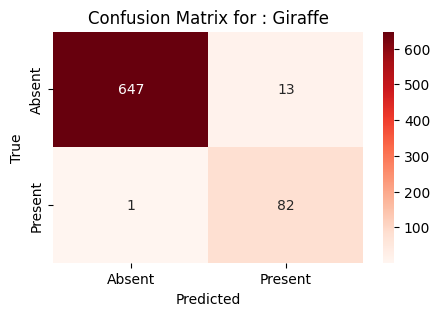

In [286]:
plot_confusion_matrix(confusion_matrix[0], "Confusion Matrix for : Giraffe", labels=['Absent','Present'], color='Red')

Confusion Matrix : Zebra

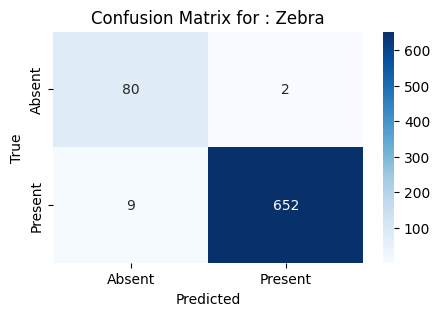

In [285]:
plot_confusion_matrix(confusion_matrix[1], "Confusion Matrix for : Zebra", labels=['Absent','Present'], color='Blue')

## Plotting

In [187]:
test_df.shape

(743, 3)

In [287]:
test_df['giraffe_pred'] = predicted[:, 0]
test_df['zebra_pred'] = predicted[:, 1]

In [326]:
giraffe_match = np.where((test_df['giraffe'] == 1) & (test_df['giraffe_pred'] == 1))[0]
zebra_match = np.where((test_df['zebra'] == 1) & (test_df['zebra_pred'] == 1))[0]

In [350]:
giraffe_match = np.random.choice(giraffe_match, size=5, replace=False)
zebra_match = np.random.choice(zebra_match, size=5, replace=False)

In [329]:
from PIL import Image

In [344]:
def plot_images(images, titles, label, rows=1, cols=5, figsize=(15, 4), title_fontsize=10):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(f'Classifications : {label}', fontsize=14)
    axes = axes.flatten()

    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image)
        axes[i].set_title(title, fontsize=title_fontsize, rotation=20)
        axes[i].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

#### Plot : Classification - Giraffe (5 instances)

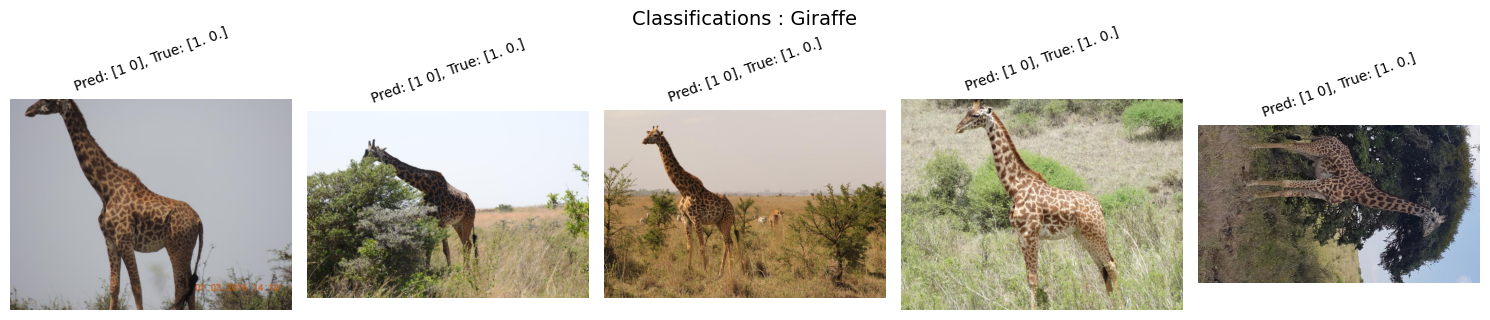

In [345]:
np.random.seed(45)

correct_giraffe_images = []

for items in giraffe_match :
    filename = test_df.iloc[items]['filename']
    file_path = os.path.join(images_dir, filename)
    img = Image.open(file_path)
    correct_giraffe_images.append((img, f'Pred: {predicted[items]}, True: {true[items]}'))

plot_images(*zip(*correct_giraffe_images), label='Giraffe')

#### Plot : Classification - Zebra (5 instances)

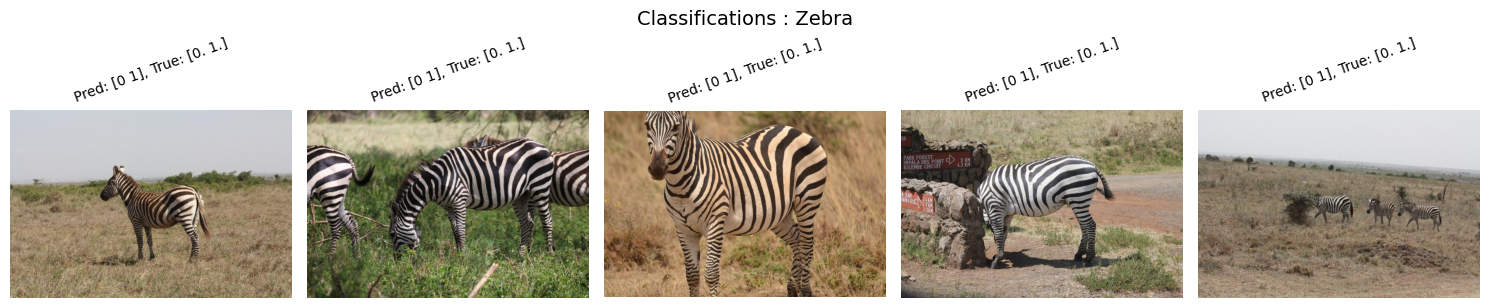

In [346]:
np.random.seed(45)

correct_zebra_images = []

for items in zebra_match :
  filename = test_df.iloc[items]['filename']
  file_path = os.path.join(images_dir, filename)
  img = Image.open(file_path)
  correct_zebra_images.append((img, f'Pred: {predicted[items]}, True: {true[items]}'))

plot_images(*zip(*correct_zebra_images), label='Zebra')

#### Plot : Misclassification (5 instances)

In [352]:
mismatch = np.where(true != predicted)[0]

In [372]:
np.random.seed(45)
mismatch = np.random.choice(mismatch, size=5, replace=False)

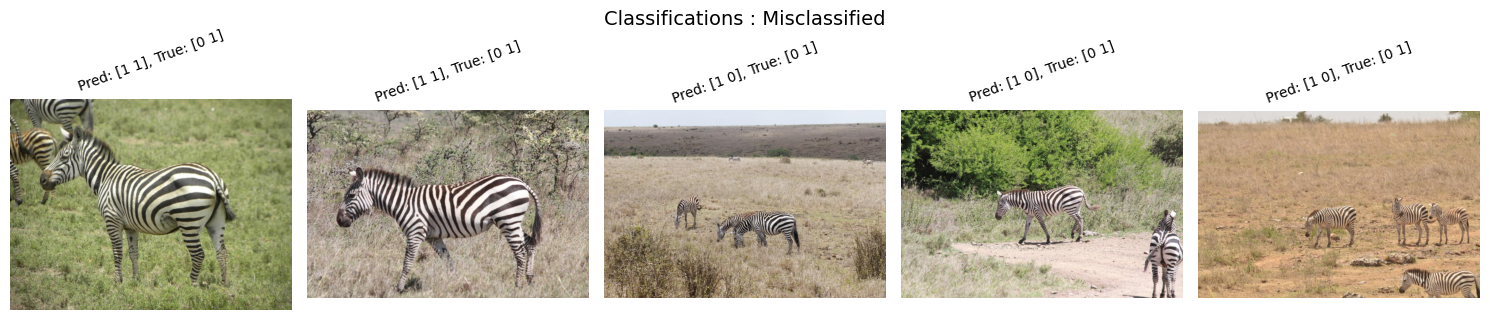

In [373]:
misclassified = []

for items in mismatch :
    filename = test_df.iloc[items]['filename']

    file_path = os.path.join(images_dir, filename)
    img = Image.open(file_path)
    file_data = test_df[test_df['filename']==filename]
    true_g, true_z = file_data['giraffe'].item(), file_data['zebra'].item()
    misclassified.append((img, f'Pred: {predicted[items]}, True: [{true_g} {true_z}]'))

plot_images(*zip(*misclassified), label='Misclassified')